# ***Predicting the Energy Output of Wind Turbine ***

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import os

In [45]:
data = pd.read_csv('/content/drive/MyDrive/Data science/CSVS/T1.csv')

In [46]:
data.rename(columns = {'LV ActivePower (kW)':'ActivePower(kW)',
                       "Wind Speed (m/s)":"WindSpeed(m/s)",
                       "Wind Direction (°)":"WindDirection","Theoretical_Power_Curve (KWh)":"TheoreticalPowerCurve(KWh)"},
            inplace = True)
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


In [47]:

data['Date/Time'] = pd.to_datetime(data['Date/Time'],format='%d %m %Y %H:%M')
data['year'] = data['Date/Time'].dt.year 
data['month'] = data['Date/Time'].dt.month 
data['day'] = data['Date/Time'].dt.day

In [48]:
data['Hour'] = data['Date/Time'].dt.hour 
data['minute'] = data['Date/Time'].dt.minute 
data.head()

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40


In [49]:
def mean_speed(x):
    x = round(x,2)
    a = x//1
    a,b = a+0.25,a+0.75
    if x < a:
        x = a - 0.25
    else:
        x = b -0.25
    return x

In [50]:
data['meanSpeed'] = data['WindSpeed(m/s)'].apply(mean_speed)
data.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5
...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5


In [51]:
def mean_direction(x):
    list=[]
    i=15
    while i<=375:
        list.append(i)
        i+=30
        
    for i in list:
        if x < i:
            x=i-15
            if x==360:
                return 0
            else:
                return x

In [52]:
data["meanDirection"]=data["WindDirection"].apply(mean_direction)
data.head(100)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2018-01-01 15:50:00,2820.512939,10.772420,3186.029883,225.276398,2018,1,1,15,50,10.5,240
96,2018-01-01 16:00:00,2812.279053,10.647520,3133.259224,224.680603,2018,1,1,16,0,10.5,210
97,2018-01-01 16:10:00,2530.447021,9.982661,2781.274041,225.519501,2018,1,1,16,10,9.5,240
98,2018-01-01 16:20:00,2399.121094,9.874386,2711.492458,227.273804,2018,1,1,16,20,9.5,240


In [53]:
directiondict = {0:"N", 30:"NNE", 60:"NEE", 90:"E", 120:"SEE", 150:"SSE", 180:"S", 210:"SSW", 240:"SWW", 270:"W", 300:"NWW", 330:"NNW"}

def wind_direction(x):
  for x in directiondict:
    return directiondict[x]

In [54]:
data['windCDirection'] = data['meanDirection'].apply(wind_direction)

In [55]:
data.head(10)

,Date/Time,ActivePower(kW),WindSpeed(m/s),TheoreticalPowerCurve(KWh),WindDirection,year,month,day,Hour,minute,meanSpeed,meanDirection,windCDirection
0,2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904,2018,1,1,0,0,5.5,270,N
1,2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113,2018,1,1,0,10,5.5,270,N
2,2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789,2018,1,1,0,20,5.0,270,N
3,2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087,2018,1,1,0,30,5.5,270,N
4,2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286,2018,1,1,0,40,5.5,270,N
5,2018-01-01 00:50:00,402.391998,5.604052,499.436385,264.578613,2018,1,1,0,50,5.5,270,N
6,2018-01-01 01:00:00,447.605713,5.793008,557.372363,266.163605,2018,1,1,1,0,5.5,270,N
7,2018-01-01 01:10:00,387.242188,5.306050,414.898179,257.949493,2018,1,1,1,10,5.5,270,N
8,2018-01-01 01:20:00,463.651215,5.584629,493.677652,253.480698,2018,1,1,1,20,5.5,240,N
9,2018-01-01 01:30:00,439.725708,5.523228,475.706783,258.723785,2018,1,1,1,30,5.5,270,N


In [56]:

list_data=[]
list_yon=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

for i in range(0,12):
    data1T_A=data[data["windCDirection"] == list_yon[i]]
    
    DepGroup_A = data1T_A.groupby("meanSpeed")
    data_T_A = DepGroup_A.mean()
    
    data_T_A.drop(columns = {"WindSpeed(m/s)",
                             "WindDirection",
                             "meanDirection"},
                  inplace = True)
    
    listTA_WS = data_T_A.index.copy()
    data_T_A["WindSpeed(m/s)"] = listTA_WS
    
    data_T_A = data_T_A[["WindSpeed(m/s)",
                         "ActivePower(kW)",
                         "TheoreticalPowerCurve(KWh)"]]
    
    data_T_A["Index"] = list(range(1,len(data_T_A.index)+1))

    data_T_A.set_index("Index", inplace = True)
    
    data_T_A = data_T_A.round({'ActivePower(kW)': 2,
                             'TheoreticalPowerCurve(KWh)': 2})
    
    data_T_A["count"] = [len(data1T_A["meanSpeed"][data1T_A["meanSpeed"] == x]) for x in data_T_A["WindSpeed(m/s)"]]
    list_data.append(data_T_A)

In [57]:
data_T_N = list_data[0]
data_T_NNE = list_data[1]
data_T_NEE = list_data[2]
data_T_E = list_data[3]
data_T_SEE = list_data[4]
data_T_SSE = list_data[5]
data_T_S = list_data[6]
data_T_SSW = list_data[7]
data_T_SWW = list_data[8]
data_T_W = list_data[9]
data_T_NWW = list_data[10]
data_T_NNW = list_data[11]

list_table=[data_T_N,data_T_NNE,data_T_NEE,data_T_E,data_T_SEE,data_T_SSE,data_T_S,
            data_T_SSW,data_T_SWW,data_T_W,data_T_NWW,data_T_NNW]

list_tableName=["N","NNE","NEE","E","SEE","SSE","S","SSW","SWW","W","NWW","NNW"]

In [58]:
def graph_T(i):
    fig = plt.figure(figsize=(10,5))  
    plt.plot(list_table[i]["WindSpeed(m/s)"],
             list_table[i]["TheoreticalPowerCurve(KWh)"],
             label = "Theoretical Power Curve",
             marker = "o", markersize = 10, linewidth = 5)
    
    plt.plot(list_table[i]["WindSpeed(m/s)"],
             list_table[i]["ActivePower(kW)"],
             label = "Actual Power Curve",
             marker = "o", markersize = 10, linewidth = 5)
    
    plt.xlabel("Wind Speed (m/s)")
    plt.ylabel("Power (kW)")
    plt.title("Direction towards {}".format(list_tableName[i]))
    plt.legend()
    plt.show()
    fig.savefig("{}_Powercurve.jpeg".format(list_tableName[i]))
    plt.close(fig)

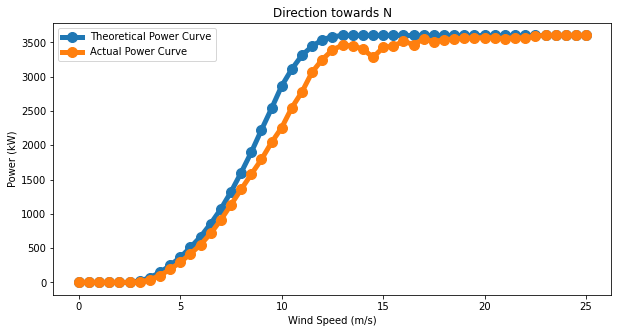

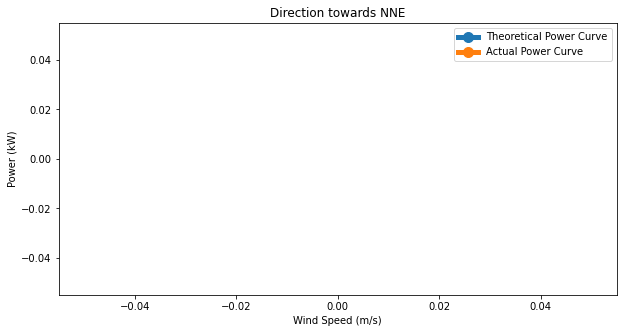

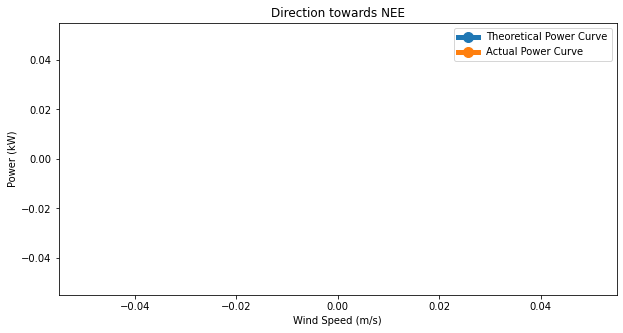

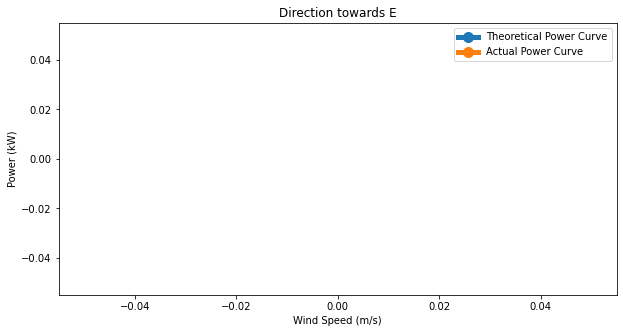

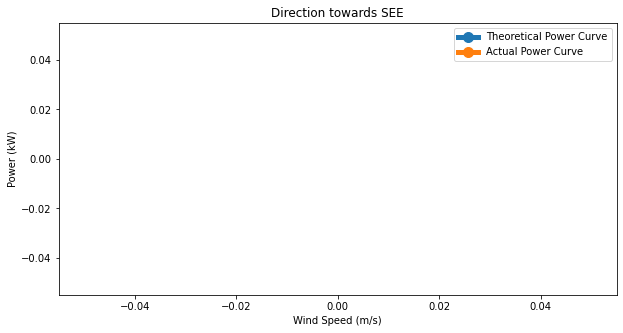

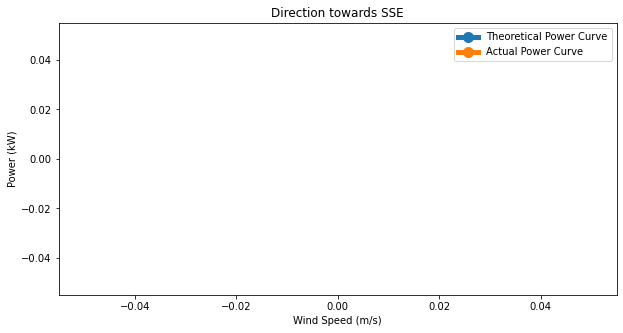

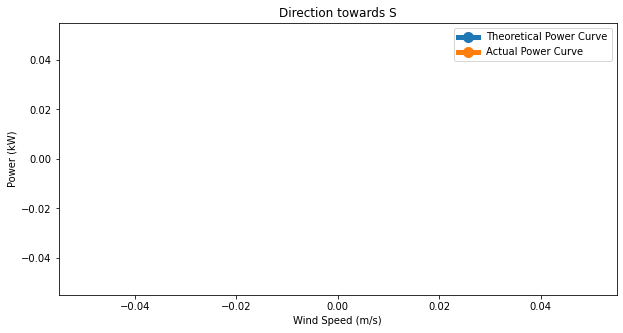

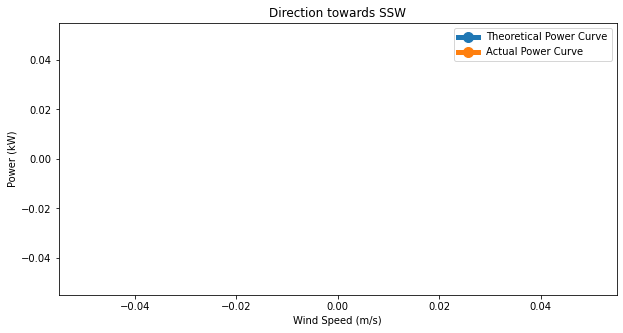

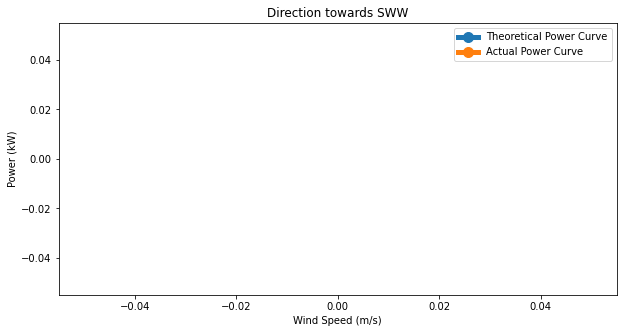

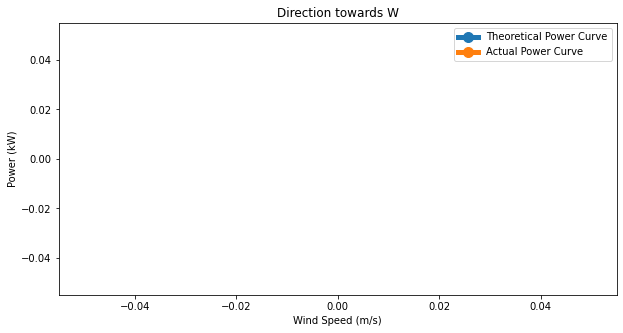

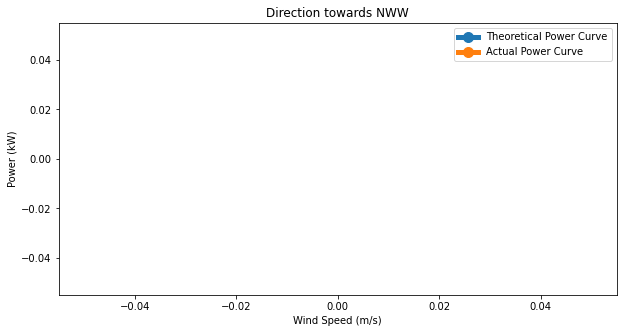

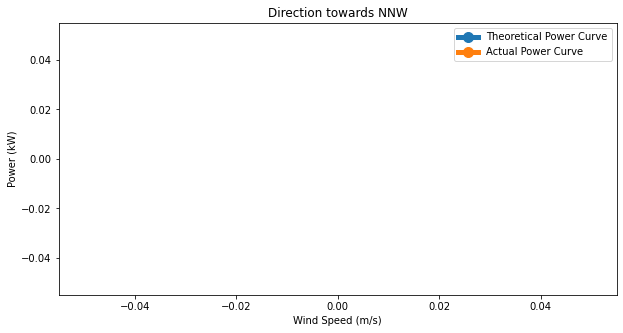

In [59]:
for i in range(0,12):
    graph_T(i)

In [60]:
X = data[[ 'WindDirection', 'month', 'WindSpeed(m/s)']]

In [61]:
X

,WindDirection,month,WindSpeed(m/s)
0,259.994904,1,5.311336
1,268.641113,1,5.672167
2,272.564789,1,5.216037
3,271.258087,1,5.659674
4,265.674286,1,5.577941
...,...,...,...
50525,80.502724,12,11.404030
50526,84.062599,12,7.332648
50527,84.742500,12,8.435358
50528,84.297913,12,9.421366


In [62]:
y = data['ActivePower(kW)']

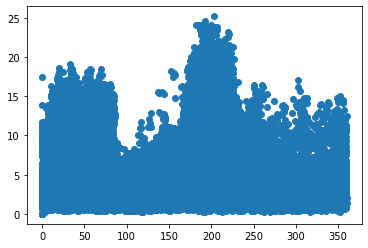

In [63]:
import matplotlib.pyplot as plt
%matplotlib inline
#WindDirection Vs WindSpeed

plt.scatter(data['WindDirection'],data['WindSpeed(m/s)'])

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [65]:

# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
linr = LinearRegression()
linr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state = 0)
dtr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [67]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0, n_jobs = -1)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [68]:
# Fitting xgboost Regression to the dataset
import xgboost as xgb
xgbr = xgb.XGBRegressor(n_jobs= -1)
xgbr.fit(X_train, y_train)

[03:50:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [69]:
regression = {0:'LinearRegression', 1:'DecisionTreeRegressor', 2:'RandomForestRegressor', 3:'xgboost'}
reg = {0:linr,1:dtr, 2:rfr, 3:xgbr}
y_pred = {0:'y_lin', 1:'y_dtr', 2:'y_rfr', 3:'y_xgb'}

In [70]:

for i in range(0, 4):
    print('\n\n-------------------------------------------------------------------------------')
    print('Type of regression model: {}'.format(regression[i]))
    # Predicting a new result
    y_pred[i] = reg[i].predict(X_test)
    # calculate MAE, MSE, RMSE and r2
    import sklearn.metrics as metrics
    print('Mean Absolute Error (MAE) = ',metrics.mean_absolute_error(y_test, y_pred[i]))
    print('Mean Squared Error (MSE) = ',metrics.mean_squared_error(y_test, y_pred[i]))
    print('Root Mean Squared Error (RMSE) = ',np.sqrt(metrics.mean_squared_error(y_test, y_pred[i])))
    print('R2 Score = ',metrics.r2_score(y_test, y_pred[i]))
    print('-------------------------------------------------------------------------------')




-------------------------------------------------------------------------------
Type of regression model: LinearRegression
Mean Absolute Error (MAE) =  389.5280360359254
Mean Squared Error (MSE) =  289443.8524528424
Root Mean Squared Error (RMSE) =  537.9998628743714
R2 Score =  0.8303687203166857
-------------------------------------------------------------------------------


-------------------------------------------------------------------------------
Type of regression model: DecisionTreeRegressor
Mean Absolute Error (MAE) =  132.8168027015632
Mean Squared Error (MSE) =  157373.24537015855
Root Mean Squared Error (RMSE) =  396.70296869340234
R2 Score =  0.907769936124639
-------------------------------------------------------------------------------


-------------------------------------------------------------------------------
Type of regression model: RandomForestRegressor
Mean Absolute Error (MAE) =  118.74780026407821
Mean Squared Error (MSE) =  104004.43019259642
Root Me

In [71]:
# Split the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8)

In [72]:
# Fitting Random Forest Regression to the dataset
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 10, random_state = 0, n_jobs = -1)
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=-1, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [73]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [74]:
# fit the regressor with x and y data
regressor.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [76]:
lasso = Lasso(alpha = 0.01)
model = lasso.fit(X_train, y_train) 
pred_train_lasso= lasso.predict(X_train)

print("Training RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_train,pred_train_lasso)))
print(r2_score(y_train, pred_train_lasso))

pred_test_lasso= lasso.predict(X_test)
print("Testing RMSE and R2 score:")
print(np.sqrt(mean_squared_error(y_test,pred_test_lasso))) 
print(r2_score(y_test, pred_test_lasso))

Training RMSE and R2 score:
533.0701562459259
0.8350012178304358
Testing RMSE and R2 score:
531.0810073199563
0.8363688487785604


In [77]:
print(*model.predict([[330.95,5,7.85]]))

1410.8236038515945


In [ ]:
import pickle
Pkl_wind= "Pickle_lasso_wind.pkl"  

with open(Pkl_wind, 'wb') as file:  
    pickle.dump(lasso, file)